## MINI PROJECT - DATA ANALYTICS

> ### OBJECTIVE: 
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
> 
> ### DATASET: 
> - The Melbourne Housing Market dataset, available at [Kaggle - Melbourne Housing](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

### BACKGROUND

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe you can find a trend to this matter? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should you buy a 2 bedroom unit?



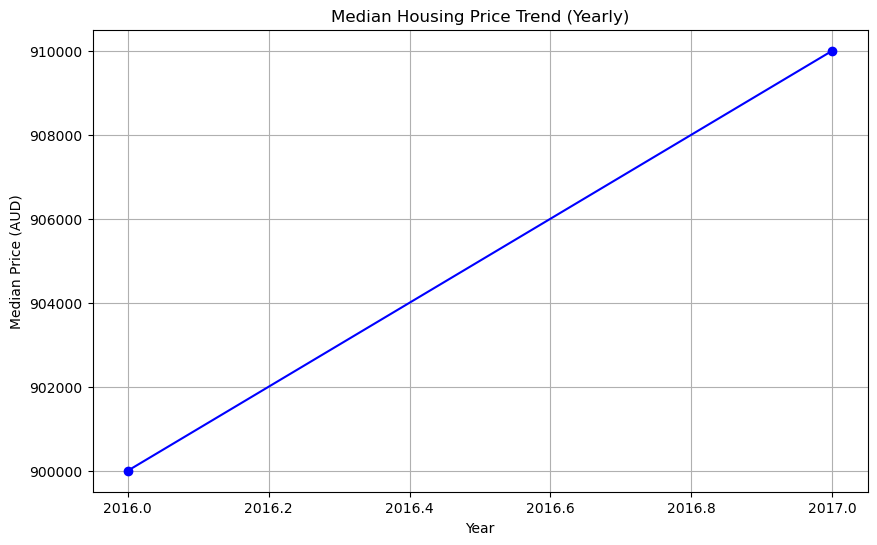

Top 5 Most Expensive Suburbs:
Suburb
Kooyong        2185000.0
Eaglemont      1901000.0
Albert Park    1900000.0
Canterbury     1890000.0
Middle Park    1880000.0
Name: Price, dtype: float64

Top 5 Most Affordable Suburbs:
Suburb
Melton South     390000.0
Wallan           366000.0
Kurunjang        353500.0
Rockbank         340000.0
Bacchus Marsh    285000.0
Name: Price, dtype: float64

Top 5 Suburbs with Highest Median Price for 2-Bedroom Units:
Suburb
Princes Hill    1625000.0
Beaumaris       1470000.0
Albert Park     1455000.0
Ashburton       1445000.0
Blackburn       1425000.0
Name: Price, dtype: float64


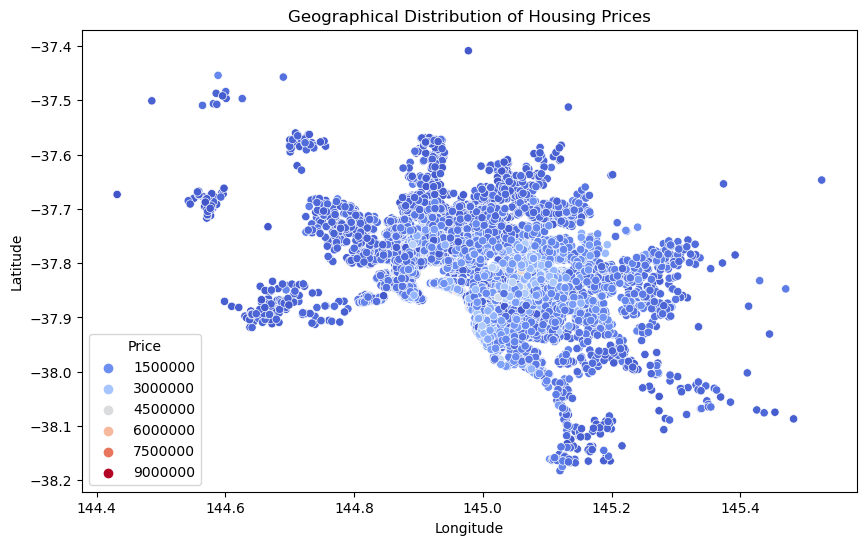

In [35]:
# # Convert 'Date' column to datetime type with appropriate format
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Trend Analysis
# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Calculate median housing price by year
median_price_yearly = df.groupby('Year')['Price'].median()

# Plotting median housing price trend
plt.figure(figsize=(10, 6))
median_price_yearly.plot(marker='o', color='b')
plt.title('Median Housing Price Trend (Yearly)')
plt.xlabel('Year')
plt.ylabel('Median Price (AUD)')
plt.grid(True)
plt.show()

# Suburb Analysis
# Calculate median housing price by suburb
median_price_suburb = df.groupby('Suburb')['Price'].median().sort_values(ascending=False)

# Display top 5 most expensive suburbs
print("Top 5 Most Expensive Suburbs:")
print(median_price_suburb.head())

# Display top 5 most affordable suburbs
print("\nTop 5 Most Affordable Suburbs:")
print(median_price_suburb.tail())

# Property Type Analysis (2-bedroom units)
# Filter dataframe for 2-bedroom units
two_bedroom_units = df[df['Rooms'] == 2]

# Calculate median price of 2-bedroom units by suburb
median_price_2bedroom = two_bedroom_units.groupby('Suburb')['Price'].median().sort_values(ascending=False)

# Display top 5 suburbs with highest median price for 2-bedroom units
print("\nTop 5 Suburbs with Highest Median Price for 2-Bedroom Units:")
print(median_price_2bedroom.head())

# Location Analysis (Visualizing Housing Prices)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longtitude', y='Lattitude', hue='Price', palette='coolwarm', data=df)
plt.title('Geographical Distribution of Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

> ### Descriptive Analytics

To address the question regarding Melbourne's housing bubble and related trends, we can perform further analysis on the dataset to identify potential insights:

1. **Trend Analysis:** We can analyze trends in housing prices over time to identify patterns that may indicate the presence of a housing bubble. This can involve plotting the median housing prices over different periods (e.g., monthly or yearly) and examining any significant increases or fluctuations.

2. **Suburb Analysis:** We can identify suburbs with the highest and lowest median housing prices to determine which areas are considered the most expensive or affordable. This analysis can help prospective buyers understand where they may get the best value for their money.

3. **Property Type Analysis:** Focusing on 2-bedroom units specifically, we can analyze their median prices across different suburbs to identify areas where they are relatively more affordable or expensive. This can help potential buyers target suburbs that offer suitable options within their budget.

4. **Location Analysis:** We can also analyze the geographical distribution of housing prices to identify any clustering of high-priced or low-priced properties. This can provide insights into which areas are considered prestigious or desirable for real estate investment.

5. **Additional Factors:** Factors such as proximity to amenities, transportation infrastructure, schools, and job opportunities can also influence housing prices and buyer preferences. Incorporating these factors into the analysis can provide a more holistic understanding of the housing market dynamics in Melbourne.

By conducting these analyses and interpreting the results, we can provide insights into Melbourne's housing market trends, identify suburbs that offer good value for money, pinpoint expensive areas, and recommend potential locations for purchasing 2-bedroom units.

### CONTENT & ACKNOWLEDGEMENTS
This data was scraped from publicly available results posted every week from Domain.com.au, it's cleaned, but you should check it properly to make sure the data analysis is valid. 

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### DATA DICTIONARY AND KEY DETAILS

- **Suburb:** Suburb
- **Address:** Address
- **Rooms:** Number of rooms
- **Price:** Price in Australian dollars

- **Method:**
**S** - property sold;
**SP** - property sold prior;
**PI** - property passed in;
**PN** - sold prior not disclosed;
**SN** - sold not disclosed;
**NB** - no bid;
**VB** - vendor bid;
**W** - withdrawn prior to auction;
**SA** - sold after auction;
**SS** - sold after auction price not disclosed.
**N/A** - price or highest bid not available.

- **Type:**
**br** - bedroom(s);
**h** - house,cottage,villa, semi,terrace;
**u** - unit, duplex;
**t** - townhouse;
**dev site** - development site;
**o res** - other residential.

- **SellerG:** Real Estate Agent
- **Date:** Date sold
- **Distance:** Distance from CBD in Kilometres
- **Regionname:** General Region (West, North West, North, North east …etc)
- **Propertycount:** Number of properties that exist in the suburb.
- **Bedroom2:** Scraped # of Bedrooms (from different source)
- **Bathroom:** Number of Bathrooms
- **Car:** Number of carspots
- **Landsize:** Land Size in Metres
- **BuildingArea:** Building Size in Metres
- **YearBuilt:** Year the house was built
- **CouncilArea:** Governing council for the area
- **Lattitude:** Self explanitory
- **Longtitude:** Self explanitory

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure. 
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns. = 13580 rows × 21 columns
> - Data types of each column. = dtypes: float64(12), int64(1), object(8)
> - Missing values of each column. = Car                62
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
> - Any initial observations or issues you notice (if any).

**Answer:**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("melb_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

**Descriptive Analytic:**

From the information above, we can see that there are consists of 13580 rows and 21 columns. In terms of data types, there are 12 columns with float64 data type containing information such as property price, distance to the city center, land size, and building area. Additionally, there is 1 column with int64 data type indicating the number of rooms in the property. Meanwhile, 8 columns have object data type encompassing information such as suburb name, property type, sales method, and seller name. Within this dataset, there are some missing values, including 62 missing values in the Car column, 6450 missing values in the BuildingArea column, 5375 missing values in the YearBuilt column, and 1369 missing values in the CouncilArea column.

### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns. 
> - Transform the identified columns to the suggested data types.

**Answer:**
>The datatypes that must be changed are:
>- Car : int
>
>- Bathroom : int
>
>- Bedroom : int
>
>- Date : datetime
>
>- landsize : int
>
>- postcode : int
>
>- yearbuilt : int

note: sebelum membuat nomor 2, kita membuat nomor 3 terlebih dahulu untuk handling missing valuesnya (run terlebih dahulu nomor 3).

In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [43]:
# Mengganti nilai NA dengan 0 dalam kolom 'Car'
# Mengganti nilai NA dengan 0 dalam kolom 'Car' dan mengubahnya menjadi int64
df['Car'] = df['Car'].astype(np.int64)

# mengubah bathroom menjadi int 
df['Bathroom'] = df['Bathroom'].astype(np.int64)

# mengubah bedroom menjadi int
df['Bedroom2'] = df['Bedroom2'].astype(np.int64)

# Menentukan format tanggal yang benar
# Mengubah kolom 'Date' ke tipe data datetime dengan format yang benar
date_format = '%d/%m/%Y'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)

# mengubah lansize menjadi int
df['Landsize'] = df['Landsize'].astype(np.int64)

# mengubah postcode menjadi int
df['Postcode'] = df['Postcode'].astype(np.int64)

# mengubah yearbuilt menjadi int
df['YearBuilt'] = df['YearBuilt'].astype(np.int64)

# mengubah building area menjadi int
df['BuildingArea']=df['BuildingArea'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  int64         
 13  Landsize       13580 non-null  int64         
 14  BuildingArea   13580 non-null  int64         
 15  YearBuilt      1358

**Descriptive Analytic:**

After transforming the data types, we can see the datatype of car, bathroom, bedroom, landsize, postcode, and yearbuilt changes to integer, then for date changes to datetime.

Changing the data types of Car, Bathroom, Bedroom, Landsize, Postcode, and YearBuilt to integer is justified by their inherent nature as discrete numerical values, such as the number of rooms, bathrooms, car spaces, land size, postcode, and construction year. Integer data types are appropriate for these columns as they accurately reflect whole numbers without fractional components, aligning well with the concept of counts or identifiers that are typically associated with these attributes in real estate datasets. On the other hand, converting the Date column to datetime is essential for efficient time-related operations and analyses.

There are still consists of 13580 rows and 21 columns.

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [39]:
# Identify any columns that have missing values, you can also show the number and percentage of missing values.
# Menghitung jumlah nilai yang hilang di setiap kolom
missing_values = df.isna().sum()

# Menghitung persentase nilai yang hilang di setiap kolom
missing_percentage = (missing_values / len(df)) * 100

# Menggabungkan hasil ke dalam dataframe baru
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Menampilkan kolom-kolom yang memiliki nilai yang hilang
print("Columns with missing values:")
print(missing_info[missing_info['Missing Values'] > 0])

Columns with missing values:
              Missing Values  Percentage
Car                       62    0.456554
BuildingArea            6450   47.496318
YearBuilt               5375   39.580265
CouncilArea             1369   10.081001


**Descriptive Analytic:**

From the information above, the missing values in this dataset reveal that the column with the highest percentage of missing values is BuildingArea, accounting for 47.5% of the data. This indicates a significant portion of missing information regarding the area of the buildings. Following closely is the YearBuilt column with 39.6% missing values, indicating a substantial gap in data regarding the construction years of the properties. Additionally, the CouncilArea column has 10.1% missing values, suggesting some missing information about the council area associated with the properties. Finally, the Car column has the least amount of missing values, at 0.46%, implying minimal missing data related to the number of car spaces in the properties. These insights underscore the importance of addressing missing values, especially in critical columns like BuildingArea and YearBuilt, to ensure the completeness and reliability of analyses and predictions based on this real estate dataset.

In [40]:
# Imputasi nilai yang hilang dengan median
median_car = df['Car'].median()
median_building_area = df['BuildingArea'].median()
median_year_built = df['YearBuilt'].median()

# Mengisi nilai yang hilang dengan median
df['Car'].fillna(median_car, inplace=True)
df['BuildingArea'].fillna(median_building_area, inplace=True)
df['YearBuilt'].fillna(median_year_built, inplace=True)

In [41]:
# Menghitung modus dari kolom CouncilArea
mode_council_area = df['CouncilArea'].mode()[0]

# Mengisi nilai yang hilang dengan modus
df['CouncilArea'].fillna(mode_council_area, inplace=True)

In [42]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Year             0
dtype: int64

**Descriptive Analytic:**

After handling the missing values, this dataset show that all columns have zero missing values, indicating a complete dataset with no gaps in any attribute. This completeness is crucial for conducting reliable and comprehensive analyses on the real estate data, ensuring that all variables are accounted for in the calculations and interpretations. With no missing values across any column, analysts and data scientists can proceed with confidence in utilizing this dataset for various analytical tasks.

In [23]:
df.to_csv('checking_file.csv', index=False)

**Descriptive Analytic:**

The code **df.to_csv('checking_file.csv', index = False)** exports the DataFrame df to a CSV file named “checking_file.csv” without including the index column, thus facilitating a thorough descriptive analysis. This exported file allows checking the integrity of the data from questions 1 to 3.

### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers: 
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  int64         
 13  Landsize       13580 non-null  int64         
 14  BuildingArea   13580 non-null  int64         
 15  YearBuilt      1358

In [13]:
# split numeric and object data
df_num = df.select_dtypes(include =['int64', 'float64'])

In [14]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Price          13580 non-null  float64
 2   Distance       13580 non-null  float64
 3   Postcode       13580 non-null  int64  
 4   Bedroom2       13580 non-null  int64  
 5   Bathroom       13580 non-null  int64  
 6   Car            13580 non-null  int64  
 7   Landsize       13580 non-null  int64  
 8   BuildingArea   13580 non-null  int64  
 9   YearBuilt      13580 non-null  int64  
 10  Lattitude      13580 non-null  float64
 11  Longtitude     13580 non-null  float64
 12  Propertycount  13580 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.3 MB


In [15]:
import numpy as np

# Function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Function to handle outliers by replacing them with median
def handle_outliers(data):
    outliers = detect_outliers_iqr(data)
    median = np.median(data[~outliers])  # Compute median excluding outliers
    data[outliers] = median
    return data

# Loop through each column in the dataframe
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if column contains numerical data
        data = df[col].values
        outliers = detect_outliers_iqr(data)
        num_outliers = outliers.sum()
        if num_outliers > 0:
            print(f"Number of outliers in '{col}' column:", num_outliers)
            # Handle outliers in the column
            df[col] = handle_outliers(data)

print("Outliers handled successfully.")

Number of outliers in 'Rooms' column: 682
Number of outliers in 'Price' column: 612
Number of outliers in 'Distance' column: 411
Number of outliers in 'Postcode' column: 208
Number of outliers in 'Bedroom2' column: 655
Number of outliers in 'Bathroom' column: 143
Number of outliers in 'Car' column: 644
Number of outliers in 'Landsize' column: 368
Number of outliers in 'BuildingArea' column: 5648
Number of outliers in 'YearBuilt' column: 3975
Number of outliers in 'Lattitude' column: 262
Number of outliers in 'Longtitude' column: 408
Number of outliers in 'Propertycount' column: 359
Outliers handled successfully.


**Descriptive Analytic:**

From the information above, after handling the outliers, this dataset reveal the presence of outliers across various columns. Notably, the 'BuildingArea' column has the highest number of outliers with 5648 instances, followed by the 'YearBuilt' column with 3975 outliers. Other columns with a significant number of outliers include 'Rooms' with 682, 'Price' with 612, 'Bedroom2' with 655, and 'Car' with 644 outliers. The presence of outliers in these columns suggests potential anomalies or extreme values that may impact statistical analyses and modeling efforts. Handling outliers appropriately is crucial to ensure the accuracy and reliability of insights derived from this real estate dataset, particularly when conducting predictive modeling or trend analysis.

### 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
> 
> Descriptive Statistics: 
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

In [16]:
#computing the mean for each feature
df.select_dtypes(["int64", "float64"]).mean()

Rooms                 2.829013
Price            978000.803461
Distance              9.478844
Postcode           3097.244183
Bedroom2              2.814580
Bathroom              1.498822
Car                   1.450884
Landsize            414.915611
BuildingArea        125.940869
YearBuilt          1969.025847
Lattitude           -37.807628
Longtitude          144.996351
Propertycount      7053.437113
dtype: float64

**Descriptive Analytic:**

From the information above, we can see that this is the median calculation result of several property features. The average room is 2.82, the average price is 978,000.80, the average distance is 9.47, etc. Mean gives us an at-a-glance value of the data.

The implication of these mean values is that if we randomly select a sample of properties from this dataset, we will usually get values that are around the mean for each of those features. For example, the price of a randomly selected property would most likely be around 978,000.80, with the number of rooms around 2.82. However, keep in mind that the mean is very sensitive to the presence of outliers (extreme or unusual values) which can significantly affect the mean value. 

In [17]:
#computing the median for each feature
df.select_dtypes(["int64", "float64"]).median()

Rooms                 3.0000
Price            880000.0000
Distance              9.2000
Postcode           3084.0000
Bedroom2              3.0000
Bathroom              1.0000
Car                   1.0000
Landsize            418.0000
BuildingArea        126.0000
YearBuilt          1970.0000
Lattitude           -37.8021
Longtitude          145.0002
Propertycount      6482.0000
dtype: float64

**Descriptive Analytic:**

From the information above, we can calculate the median of some property features. Here are the median values for each feature:The median rooms is 3.00, the average price is 880.000.00., the average distance is 9.20, etc. 

The implication of these median values is that if we randomly select a sample of properties from this dataset, we will usually get values that are around the median for each feature. For example, the price of a randomly selected property will most likely be around 880,000.00, with a room count of around 3.00. The median gives an idea of the middle value of the data without being affected by outliers, unlike the mean value.

In [18]:
#computing the mode for each feature
df.Car.value_counts() #cara 1

Car
1    6153
2    5653
0    1026
3     748
Name: count, dtype: int64

**Descriptive Analytic:**

From the information above, we can calculate the mode of the "Car" feature in the DataFrame. Here are the mode values for the "Car" feature: The frequency of occurrence of value 1 is 6153, value 2 is 5653, value 0 is 1026, value 3 is 748.

The mode is the most frequently occurring value in a dataset. In this case, the value 1 has the highest frequency, followed by the values 2, 0, and 3.

In [19]:
#computing the mode for each feature
df.select_dtypes(["int64", "float64"]).mode() #cara 2

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,3,880000.0,9.2,3084,3,1,1,0,126,1970,-37.8021,145.0002,6482.0


**Descriptive Analytic:**

From the information above, our goal is to find the mode value, or the value that most often comes out of some of the data above, such as the number of rooms has a mode of 3, distance 9.2, bathrooms 1, etc.

In [20]:
#computing the variance for each feature
df.select_dtypes(["int64", "float64"]).var()

Rooms            6.379681e-01
Price            1.978214e+11
Distance         1.993219e+01
Postcode         3.535202e+03
Bedroom2         6.359167e-01
Bathroom         3.900862e-01
Car              5.088916e-01
Landsize         8.076976e+04
BuildingArea     7.718206e+00
YearBuilt        6.945769e+01
Lattitude        4.886054e-03
Longtitude       7.625195e-03
Propertycount    1.370856e+07
dtype: float64

**Descriptive Analytic:**

From the information above, it can be seen that the variance for each feature varies significantly. For example, the price feature (Price) has a very high variance, indicating a large variation in property prices. In contrast, features such as number of rooms, distance to CBD, and number of bathrooms have a lower variance, indicating consistency or little variation in the data. The highest variance is found in the Landsize feature, indicating a large variation in the size of the property being measured. In addition, features such as YearBuilt and the number of neighboring properties (Propertycount) also show significant variation. This analysis provides an overview of the data distribution and variation within each feature, essential for understanding the overall characteristics of the dataset.

In [21]:
#range
df["Price"].min(), df["Price"].max()

(85000.0, 2350000.0)

**Descriptive Analytic:**

From the information above, the range of property prices in this dataset varies from 85.000 to 2.350.000. This indicates a significant variation in the prices of the observed properties, with the cheapest property having a value of approximately 85.000 and the most expensive property reaching 2.35.000. This analysis illustrates the wide variation in the price range of properties observed in the dataset, from affordable to very expensive.

In [22]:
#computing the range for each feature #cara 2
for i in df:
    try:
        print(f'{i} range {df[i].max() - df[i].min()}')
    except:
        pass

Rooms range 3
Price range 2265000.0
Date range 604 days 00:00:00
Distance range 23.3
Postcode range 207
Bedroom2 range 3
Bathroom range 3
Car range 3
Landsize range 1357
BuildingArea range 28
YearBuilt range 59
Lattitude range 0.4006299999999996
Longtitude range 0.5139199999999846
Propertycount range 17247.0


**Descriptive Analytic:**

The feature range analysis shows significant variation within each attribute of the dataset. For example, the "Rooms" feature has a range of 3, showing variation in the number of rooms from the smallest to the largest in the property. The price range shows large variations, with a difference of up to 2,265,000 between the cheapest and most expensive properties in the dataset. Meanwhile, the "Date" feature shows a time range of 604 days. Other features also show significant variation, such as distance to CBD (Distance) with a range of 23.3 kilometers, and land size (Landsize) with a range of 1357 square meters. This analysis provides insights into the data distribution and variation within each feature.

In [23]:
#computing the range for each feature #cara 3
for i in df:
    try:
        print(f'{i} max val: {df[i].max()}')
        print(f'{i} min val: {df[i].min()}')
        print(f'{i} range val: {df[i].max() - df[i].min()}')
        print("\n")
    except:
        pass

Suburb max val: Yarraville
Suburb min val: Abbotsford
Address max val: 9b Stewart St
Address min val: 1 Adelle Ct
Rooms max val: 4
Rooms min val: 1
Rooms range val: 3


Type max val: u
Type min val: h
Price max val: 2350000.0
Price min val: 85000.0
Price range val: 2265000.0


Method max val: VB
Method min val: PI
SellerG max val: iTRAK
SellerG min val: @Realty
Date max val: 2017-09-23 00:00:00
Date min val: 2016-01-28 00:00:00
Date range val: 604 days 00:00:00


Distance max val: 23.3
Distance min val: 0.0
Distance range val: 23.3


Postcode max val: 3207
Postcode min val: 3000
Postcode range val: 207


Bedroom2 max val: 4
Bedroom2 min val: 1
Bedroom2 range val: 3


Bathroom max val: 3
Bathroom min val: 0
Bathroom range val: 3


Car max val: 3
Car min val: 0
Car range val: 3


Landsize max val: 1357
Landsize min val: 0
Landsize range val: 1357


BuildingArea max val: 140
BuildingArea min val: 112
BuildingArea range val: 28


YearBuilt max val: 1997
YearBuilt min val: 1938
YearBuilt ra

**Descriptive Analytic:**

Feature range analysis using this method reveals significant variation within each attribute of the dataset. For example, in the "Rooms" feature, the range is 3, showing variations from 1 to 4 rooms in the property. The price range of the properties (Price) shows a marked difference, with the most expensive property valued at 2,350,000 and the cheapest at 85,000, creating a value range of 2,265,000. The transaction time (Date) shows a period from January 28, 2016 to September 23, 2017, for a total of 604 days.

Other features also show important variations. For example, the distance to CBD (Distance) range is 23.3 kilometers, while the postal code range is 207. This shows significant differences in the location of properties. This analysis provides a better understanding of the data distribution and variation within each attribute, which is important information in modeling and further understanding the dataset.

In [24]:
#computing the standard deviation for each feature
df.select_dtypes(["int64", "float64"]).std()

Rooms                 0.798729
Price            444771.159593
Distance              4.464548
Postcode             59.457566
Bedroom2              0.797444
Bathroom              0.624569
Car                   0.713366
Landsize            284.200220
BuildingArea          2.778166
YearBuilt             8.334128
Lattitude             0.069900
Longtitude            0.087322
Propertycount      3702.507602
dtype: float64

**Descriptive Analytic:**

From the calculation of the standard deviation for each feature in the dataset, it can be seen that the level of variation varies significantly among the attributes. For example, the high standard deviation of property price (Price), around 444.771, indicates a large variation in property prices in the dataset. On the other hand, features such as number of rooms (Rooms), distance to CBD (Distance), and number of bathrooms (Bathroom) have lower standard deviations, indicating more consistency or limited variation in the data. The highest standard deviation is found in the Landsize feature, indicating a large variation in the measured property size. In addition, features such as YearBuilt and the number of neighboring properties (Propertycount) also show significant variation. This analysis provides an overview of the distribution of the data and the degree of variation within each feature, which is important for understanding the overall characteristics of the dataset.

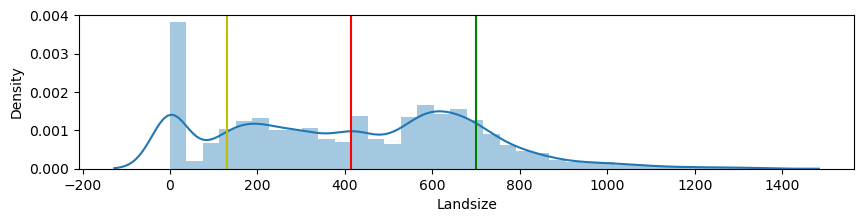

In [25]:
import warnings

#ignore warnings
warnings.filterwarnings("ignore")

#plot distribution
plt.figure(figsize = (10,2))
sns.distplot(df["Landsize"])
plt.axvline(df["Landsize"].mean(), color='r') #mean
plt.axvline((df["Landsize"].mean() - df["Landsize"].std()), color='y') #mean - std
plt.axvline((df["Landsize"].mean() + df["Landsize"].std()), color='g') #mean + std
plt.show()

**Descriptive Analytic:**

From the plot and information above, we can see that "Landsize" has a standard deviation (std) of 284.20. This means that the spread of the data distribution will be about 130.71 (mean - std) to 699.11 (mean + std) from the average value.

For example, if you were to randomly select a property, the land size ("Landsize") would likely be in that range.

Additional Insights

- The plot indicates that there are a few land sizes that fall outside the main distribution, ranging from -200 to 1400. These outliers could be worth investigating further to determine their significance.

- The distribution of land sizes could be relevant for various purposes, such as real estate pricing, land management, or environmental planning.

### 6. SUMMARY
> Summarize the analysis process: 
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)

> ####  Answer Highlight key findings from the descriptive analysis.
> 
> 1. Data Quality Assessment: Initial inspection revealed missing values in several columns, notably `Car`, `BuildingArea`, `YearBuilt`, and `CouncilArea`.
> 
> 2. Data Type Transformation: Data types of certain columns were transformed to more suitable types, such as converting numeric columns like `Car`, `Bathroom`, `Bedroom2`, `Landsize`, `Postcode`, and `YearBuilt` to integers, and converting the `Date` column to datetime format.
> 
> 3. Missing Values Handling: Missing values were addressed by imputing them with appropriate strategies:
>> - Missing values in 'Car', 'BuildingArea', and 'YearBuilt' columns were replaced with the median of each respective column.
>> - Missing values in the 'CouncilArea' column were imputed with the mode.
> 
> 4. Detecting and Handling Outliers: Outliers were detected and handled using the Interquartile Range `(IQR)` method:
>> - Outliers were identified in various columns, and then replaced with the median to mitigate their impact on analyses.
> 
> 5. Descriptive Analysis:
>> - Central tendencies (mean, median, mode) and dispersions (variance, standard deviation, range) were computed for relevant numerical columns.
>> - The distribution of key categorical variables was analyzed, including counts and proportions.
>> - Visual analysis was performed using histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

> #### Challenges Encountered:
>
> 1. Dealing with missing values: Choosing appropriate imputation methods for missing values required careful consideration to ensure the integrity and accuracy of the dataset.
> 2. Handling outliers: Determining the threshold for defining outliers and selecting the appropriate method for handling them posed challenges in maintaining the dataset's reliability and interpretability.

> #### Potential Insights or Observations:

> 1. The dataset provides comprehensive information about Melbourne's housing market, including property details, prices, and geographic locations.
> 2. Analyzing key numerical features like price, land size, and building area can offer insights into property values and market trends.
> 3. Identifying outliers and addressing them ensures that statistical analyses and modeling efforts are based on reliable and accurate data, enhancing the quality of insights derived from the dataset.

### 7. EXPORT THE CLEANED DATA
> - Export the cleaned data to a CSV file.
>
> - Ensure that the data is formatted correctly for Google Sheets import.

In [45]:
# export the cleaned data to a csv file
df.to_csv('Group4_Mini_Project_DA.csv', index=False)

> link google sheet
> https://docs.google.com/spreadsheets/d/1l2e4JvFA8A364rbDl3HbyGevYpC5U2gBoznz2bEnKWU/edit#gid=1752994208